In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# defining no. of poles and calculation of pole pitch

In [3]:
no_of_poles = 4
pole_pitch = 360/no_of_poles
pole_pitch_rad = (2*np.pi)/no_of_poles

In [4]:
# definition of bigger arc and smaller arc......
# give input as percantage of pole-pitch

control = 0.9 # default
# give offset for arc from origin
offset=0.5
air_gap_min = 0.7
inner_radius_stator = 4
outer_radius_rotor = inner_radius_stator-air_gap_min 
bigger_arc_spread_rad = control*pole_pitch*(np.pi)/180
bigger_arc_spread= control*pole_pitch
smaller_arc_spread_rad = (pole_pitch-bigger_arc_spread)*(np.pi)/180
smaller_arc_spread = pole_pitch-bigger_arc_spread
bigger_arc_spread,smaller_arc_spread

(81.0, 9.0)

In [5]:
# reflected angle of bigger arc

In [6]:
theta_1 = 90 - (bigger_arc_spread/2)
theta_1_rad = (theta_1)*(np.pi)/180
l2=offset*(np.cos(theta_1_rad))
theta_2_rad = np.arccos(l2/(outer_radius_rotor-offset))
theta_2 = (180/(np.pi))* theta_2_rad
half_theta_reflected_bigger_arc_rad = np.pi - theta_1_rad - theta_2_rad
half_theta_reflected_bigger_arc = (180/(np.pi))*half_theta_reflected_bigger_arc_rad
half_theta_reflected_bigger_arc,theta_1,theta_2

(47.159741626685296, 49.5, 83.3402583733147)

In [7]:
# start and end agle of bigger arc
start_angle_bigger_arc_rad = ((np.pi)/2)-(half_theta_reflected_bigger_arc_rad)
end_angle_bigger_arc_rad = ((np.pi)/2)+(half_theta_reflected_bigger_arc_rad)
start_angle_bigger_arc = (90)-(half_theta_reflected_bigger_arc)
end_angle_bigger_arc = (90)+(half_theta_reflected_bigger_arc)
start_angle_bigger_arc_rad,end_angle_bigger_arc_rad,start_angle_bigger_arc,end_angle_bigger_arc

(0.7477035610194116, 2.3938890925703813, 42.840258373314704, 137.1597416266853)

In [8]:
end_angle_bigger_arc-start_angle_bigger_arc

94.3194832533706

In [9]:
2*half_theta_reflected_bigger_arc

94.31948325337059

## points generaion for all bigger arcs

In [10]:
# generation of circle from start to end points................................
angle_bigger_arc_rad = np.linspace(start_angle_bigger_arc_rad,end_angle_bigger_arc_rad,100)
X_bigger_arc1 = (outer_radius_rotor-offset)*np.cos(angle_bigger_arc_rad)
# shift on y-axis
y_bigger_arc1 = (outer_radius_rotor-offset)*np.sin(angle_bigger_arc_rad)+offset

In [11]:
# Now point generation for second bigger arcs

In [12]:
# start and end agle of another bigger arc
start_angle_bigger_arc_rad2 = ((np.pi)/2)-pole_pitch_rad-(half_theta_reflected_bigger_arc_rad)
end_angle_bigger_arc_rad2 = ((np.pi)/2)-pole_pitch_rad+(half_theta_reflected_bigger_arc_rad)
start_angle_bigger_arc_rad2,end_angle_bigger_arc_rad2

(-0.823092765775485, 0.823092765775485)

In [13]:
# generation of circle from start to end points for another bigger arc................................
angle_bigger_arc_rad2 = np.linspace(start_angle_bigger_arc_rad2,end_angle_bigger_arc_rad2,100)
X_bigger_arc2 = (outer_radius_rotor-offset)*np.cos(angle_bigger_arc_rad2)+offset
# shift on y-axis
y_bigger_arc2 = (outer_radius_rotor-offset)*np.sin(angle_bigger_arc_rad2)

In [14]:
# start and end agle of bigger arc 3
start_angle_bigger_arc_rad3 = ((np.pi)/2)-(half_theta_reflected_bigger_arc_rad) + pole_pitch_rad
end_angle_bigger_arc_rad3 = ((np.pi)/2)+(half_theta_reflected_bigger_arc_rad) + pole_pitch_rad
start_angle_bigger_arc3 = (90)-(half_theta_reflected_bigger_arc)
end_angle_bigger_arc3 = (90)+(half_theta_reflected_bigger_arc)
angle_bigger_arc_rad3 = np.linspace(start_angle_bigger_arc_rad3,end_angle_bigger_arc_rad3,100)
X_bigger_arc3 = (outer_radius_rotor-offset)*np.cos(angle_bigger_arc_rad3)-offset
# shift on y-axis
y_bigger_arc3 = (outer_radius_rotor-offset)*np.sin(angle_bigger_arc_rad3)

In [15]:
# start and end agle of bigger arc 4
start_angle_bigger_arc_rad4 = ((np.pi)/2)-(half_theta_reflected_bigger_arc_rad) + pole_pitch_rad*2
end_angle_bigger_arc_rad4 = ((np.pi)/2)+(half_theta_reflected_bigger_arc_rad) + pole_pitch_rad*2
start_angle_bigger_arc4 = (90)-(half_theta_reflected_bigger_arc)
end_angle_bigger_arc4 = (90)+(half_theta_reflected_bigger_arc)
angle_bigger_arc_rad4 = np.linspace(start_angle_bigger_arc_rad4,end_angle_bigger_arc_rad4,100)
X_bigger_arc4 = (outer_radius_rotor-offset)*np.cos(angle_bigger_arc_rad4)
# shift on y-axis
y_bigger_arc4 = (outer_radius_rotor-offset)*np.sin(angle_bigger_arc_rad4)-offset

In [16]:
# start point of smaller arc
# end point of smaller arc
x1=X_bigger_arc1[0]
y1=y_bigger_arc1[0]
x2=X_bigger_arc2[99]
y2=y_bigger_arc2[99]
x1,y1,x2,y2

(2.0531063839695185, 2.403878718853595, 2.403878718853595, 2.0531063839695185)

**equation of perpendiculars**

In [17]:
# perpendicular passing through x1,y1
slope_perpendicular_1 = ((y1-offset)/x1)
slope_perpendicular_1

0.9273161555187396

In [18]:
c1  = y1-slope_perpendicular_1*x1
c1

0.5

In [19]:
# perpendicular passing through x2,y2
slope_perpendicular_2 = y2/(x2-offset)
slope_perpendicular_2

1.0783808672465123

In [20]:
c2=y2-slope_perpendicular_2*x2
c2

-0.539190433623256

In [21]:
xp1 = np.linspace(0,60,1000)
yp1 = slope_perpendicular_1*xp1+c1
xp2 = np.linspace(0,60,1000)
yp2 = slope_perpendicular_2*xp2+c2

In [22]:
## calculation of intersection of the perpendiculars................

In [23]:
import sympy as sym
x,y = sym.symbols('x,y')
eq1 = sym.Eq(y-slope_perpendicular_1*x,c1)
eq2 = sym.Eq(y-slope_perpendicular_2*x,c2)
result = sym.solve([eq1,eq2],(x,y))
result

{x: 6.87910777929365, y: 6.87910777929365}

In [24]:
list1 = list(result.values())

In [25]:
list1

[6.87910777929365, 6.87910777929365]

In [26]:
# centre co-ordinates of smaller circle..........................
xc1=float(list1[0])
yc1=float(list1[1])
xc1,yc1
# start point of smaller arc
# end point of smaller arc
x1=X_bigger_arc1[0]
y1=y_bigger_arc1[0]
x2=X_bigger_arc2[99]
y2=y_bigger_arc2[99]
xc1,yc1,x1,y1,x2,y2

(6.879107779293655,
 6.879107779293649,
 2.0531063839695185,
 2.403878718853595,
 2.403878718853595,
 2.0531063839695185)

In [27]:
#### calculation of angle spread of smaller arc.............

In [28]:
a = np.sqrt(((x1-x2)**2) + ((y1-y2)**2))
b = np.sqrt(((xc1-x2)**2) + ((yc1-y2)**2))
c = np.sqrt(((xc1-x1)**2) + ((yc1-y1)**2))
# Radius of the smaller circle\
radius_smaller_circle = c
a,b,c

(0.4960669932983382, 6.581638444268848, 6.581638444268848)

In [29]:
theta_reflected_smaller_arc_rad = np.arccos((b*b+c*c-a*a)/(2*b*c))
theta_reflected_smaller_arc = theta_reflected_smaller_arc_rad*(180/np.pi)
theta_reflected_smaller_arc,theta_reflected_smaller_arc_rad

(4.3194832533704615, 0.075389204756071)

## points generation for smaller arcs

In [30]:
# start and end angles of smaller arc1 to generate the points on smaller circle
start_angle_smaller_arc = (np.pi/2) - (pole_pitch_rad/2) + (np.pi) - (theta_reflected_smaller_arc_rad/2)

end_angle_smaller_arc_rad = (np.pi/2) - (pole_pitch_rad/2) + (np.pi) + (theta_reflected_smaller_arc_rad/2)


In [31]:
# generate points on smaller circle within given range of reflected spread
# generation of smaller circle from start to end points................................

angle_smaller_arc_rad = np.linspace(start_angle_smaller_arc,end_angle_smaller_arc_rad,100)

# shift on x-axis
X_smaller_arc = (radius_smaller_circle)*np.cos(angle_smaller_arc_rad) + xc1
# shift on y-axis
y_smaller_arc = (radius_smaller_circle)*np.sin(angle_smaller_arc_rad)+ yc1

In [32]:
# start and end angles of smaller arc2 to generate the points on smaller circle
start_angle_smaller_arc2 = (np.pi/2) - (pole_pitch_rad/2) + (np.pi) - (theta_reflected_smaller_arc_rad/2) + pole_pitch_rad

end_angle_smaller_arc_rad2 = (np.pi/2) - (pole_pitch_rad/2) + (np.pi) + (theta_reflected_smaller_arc_rad/2) + pole_pitch_rad

In [33]:
# generate points on smaller circle within given range of reflected spread
# generation of smaller circle from start to end points................................

angle_smaller_arc_rad2 = np.linspace(start_angle_smaller_arc2,end_angle_smaller_arc_rad2,100)

# shift on x-axis
X_smaller_arc2 = (radius_smaller_circle)*np.cos(angle_smaller_arc_rad2) - xc1
# shift on y-axis
y_smaller_arc2 = (radius_smaller_circle)*np.sin(angle_smaller_arc_rad2)+ yc1

In [34]:
# start and end angles of smaller arc3 to generate the points on smaller circle
start_angle_smaller_arc3 = (np.pi/2) - (pole_pitch_rad/2) + (np.pi) - (theta_reflected_smaller_arc_rad/2) + pole_pitch_rad*2

end_angle_smaller_arc_rad3 = (np.pi/2) - (pole_pitch_rad/2) + (np.pi) + (theta_reflected_smaller_arc_rad/2) + pole_pitch_rad*2

In [35]:
# generate points on smaller circle within given range of reflected spread
# generation of smaller circle from start to end points................................

angle_smaller_arc_rad3 = np.linspace(start_angle_smaller_arc3,end_angle_smaller_arc_rad3,100)

# shift on x-axis
X_smaller_arc3 = (radius_smaller_circle)*np.cos(angle_smaller_arc_rad3) - xc1
# shift on y-axis
y_smaller_arc3 = (radius_smaller_circle)*np.sin(angle_smaller_arc_rad3)- yc1


In [36]:
# start and end angles of smaller arc4 to generate the points on smaller circle
start_angle_smaller_arc4 = (np.pi/2) - (pole_pitch_rad/2) + (np.pi) - (theta_reflected_smaller_arc_rad/2) - pole_pitch_rad

end_angle_smaller_arc_rad4 = (np.pi/2) - (pole_pitch_rad/2) + (np.pi) + (theta_reflected_smaller_arc_rad/2) - pole_pitch_rad
# generate points on smaller circle within given range of reflected spread
# generation of smaller circle from start to end points................................

angle_smaller_arc_rad4 = np.linspace(start_angle_smaller_arc4,end_angle_smaller_arc_rad4,100)

# shift on x-axis
X_smaller_arc4 = (radius_smaller_circle)*np.cos(angle_smaller_arc_rad4) + xc1
# shift on y-axis
y_smaller_arc4 = (radius_smaller_circle)*np.sin(angle_smaller_arc_rad4) -  yc1


## plot all the regions together

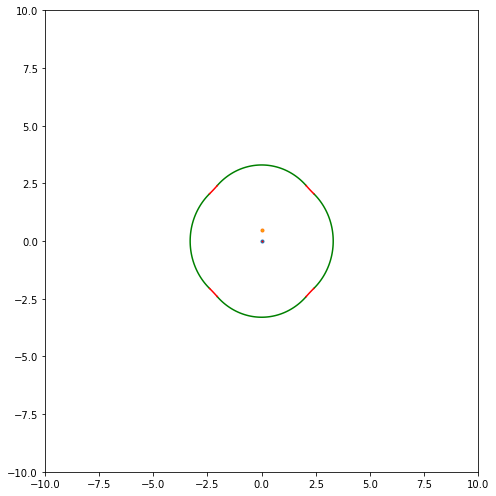

In [37]:
# plot all things together
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True
x_origin = [0]
y_origin = [0]
x_centre1=[0]
y_centre1=[offset]
x_centre2=[offset]
y_centre2=[0]
plt.xlim(-10,10)
plt.ylim(-10, 10)
# plt.grid()
# plt.axis('equal')

# plt.plot(xp1,yp1)
# plt.plot(xp2,yp2)
plt.plot(x_origin, y_origin, marker="o", markersize=3, markerfacecolor="red")
plt.plot(x_centre1, y_centre1, marker="o", markersize=3, markerfacecolor="orange")
# plt.plot(x_centre2, y_centre2, marker="o", markersize=3,markerfacecolor="green")

plt.plot(X_bigger_arc1,y_bigger_arc1,color='green')
plt.plot(X_bigger_arc2,y_bigger_arc2,color='green')
plt.plot(X_bigger_arc3,y_bigger_arc3,color='green')
plt.plot(X_bigger_arc4,y_bigger_arc4,color='green')


plt.plot(X_smaller_arc,y_smaller_arc,color='red')
plt.plot(X_smaller_arc2,y_smaller_arc2,color='red')
plt.plot(X_smaller_arc3,y_smaller_arc3,color='red')
plt.plot(X_smaller_arc4,y_smaller_arc4,color='red')


# import numpy as np
# a = np.arange(0,2*np.pi,0.1)
# X = inner_radius_stator*np.cos(a)
# Y = inner_radius_stator*np.sin(a)
# plt.plot(X,Y)
plt.savefig('2_arc_surf.png')

In [38]:
def dist(x,y):
    distance = []
    for i in range(len(x)):
        distance.append((x[i]**2 + y[i]**2)**0.5)
    return distance 
        

In [39]:
one = dist(X_smaller_arc,y_smaller_arc)

In [40]:
inner_radius_stator-min(one)+air_gap_min

1.5531094508826058

In [41]:
def maxoffsetLimitIndicator(x,y,radius,maxAirgap) :
    offset = np.arange(0,0.2*radius,0.1)
    one = dist(x,y)
    

In [114]:
############################################################################################################

In [ ]:
X_bigger_arc1,y_bigger_arc1
X_bigger_arc2,y_bigger_arc2
X_bigger_arc3,y_bigger_arc3
X_bigger_arc4,y_bigger_arc4

In [188]:
# rotation of bigger_arc_1

In [190]:
arr1=np.array((X_bigger_arc1.T,y_bigger_arc1.T)).T
theta_r=(np.pi)/4
rot_mat = np.array([[np.cos(theta_r),np.sin(theta_r)], [-np.sin(theta_r),np.cos(theta_r)]])
rotated = np.matmul(rot_mat,arr1.T).T
X_bigger_arc1_rot=[]
y_bigger_arc1_rot=[]

for ele in rotated:
    X_bigger_arc1_rot.append(ele[0])
    y_bigger_arc1_rot.append(ele[1])

In [191]:
# rotation of bigger arc 2

In [224]:
arr2=np.array((X_bigger_arc2.T,y_bigger_arc2.T)).T
theta_r=(np.pi)/4
rot_mat = np.array([[np.cos(theta_r),np.sin(theta_r)], [-np.sin(theta_r),np.cos(theta_r)]])
rotated = np.matmul(rot_mat,arr2.T).T
X_bigger_arc2_rot=[]
y_bigger_arc2_rot=[]

for ele in rotated:
    X_bigger_arc2_rot.append(ele[0])
    y_bigger_arc2_rot.append(ele[1])

In [ ]:
# rotation of bigger arc 3

In [197]:
arr3=np.array((X_bigger_arc3.T,y_bigger_arc3.T)).T
theta_r=(np.pi)/4
rot_mat = np.array([[np.cos(theta_r),np.sin(theta_r)], [-np.sin(theta_r),np.cos(theta_r)]])
rotated = np.matmul(rot_mat,arr3.T).T
X_bigger_arc3_rot=[]
y_bigger_arc3_rot=[]

for ele in rotated:
    X_bigger_arc3_rot.append(ele[0])
    y_bigger_arc3_rot.append(ele[1]) 

In [198]:
# rotation of bigger arc 4

In [200]:
arr4=np.array((X_bigger_arc4.T,y_bigger_arc4.T)).T
theta_r=(np.pi)/4
rot_mat = np.array([[np.cos(theta_r),np.sin(theta_r)], [-np.sin(theta_r),np.cos(theta_r)]])
rotated = np.matmul(rot_mat,arr4.T).T
X_bigger_arc4_rot=[]
y_bigger_arc4_rot=[]

for ele in rotated:
    X_bigger_arc4_rot.append(ele[0])
    y_bigger_arc4_rot.append(ele[1])

In [201]:
# rotation of smaller arc 1
X_smaller_arc,y_smaller_arc
X_smaller_arc2,y_smaller_arc2
X_smaller_arc3,y_smaller_arc3
X_smaller_arc4,y_smaller_arc4`

In [209]:
arr11=np.array((X_smaller_arc.T,y_smaller_arc.T)).T
theta_r=(np.pi)/4
rot_mat = np.array([[np.cos(theta_r),np.sin(theta_r)], [-np.sin(theta_r),np.cos(theta_r)]])
rotated = np.matmul(rot_mat,arr11.T).T
X_smaller_arc1_rot=[]
y_smaller_arc1_rot=[]

for ele in rotated:
    X_smaller_arc1_rot.append(ele[0])
    y_smaller_arc1_rot.append(ele[1])

In [ ]:
# rotation of smaller arc 2

In [213]:
arr12=np.array((X_smaller_arc2.T,y_smaller_arc2.T)).T
theta_r=(np.pi)/4
rot_mat = np.array([[np.cos(theta_r),np.sin(theta_r)], [-np.sin(theta_r),np.cos(theta_r)]])
rotated = np.matmul(rot_mat,arr12.T).T
X_smaller_arc2_rot=[]
y_smaller_arc2_rot=[]

for ele in rotated:
    X_smaller_arc2_rot.append(ele[0])
    y_smaller_arc2_rot.append(ele[1])


In [ ]:
# rotation of smaller arc 3

In [215]:
arr13=np.array((X_smaller_arc3.T,y_smaller_arc3.T)).T
theta_r=(np.pi)/4
rot_mat = np.array([[np.cos(theta_r),np.sin(theta_r)], [-np.sin(theta_r),np.cos(theta_r)]])
rotated = np.matmul(rot_mat,arr13.T).T
X_smaller_arc3_rot=[]
y_smaller_arc3_rot=[]

for ele in rotated:
    X_smaller_arc3_rot.append(ele[0])
    y_smaller_arc3_rot.append(ele[1])

In [ ]:
# rotation of smaller arc 4

In [217]:
arr14=np.array((X_smaller_arc4.T,y_smaller_arc4.T)).T
theta_r=(np.pi)/4
rot_mat = np.array([[np.cos(theta_r),np.sin(theta_r)], [-np.sin(theta_r),np.cos(theta_r)]])
rotated = np.matmul(rot_mat,arr14.T).T
X_smaller_arc4_rot=[]
y_smaller_arc4_rot=[]

for ele in rotated:
    X_smaller_arc4_rot.append(ele[0])
    y_smaller_arc4_rot.append(ele[1])


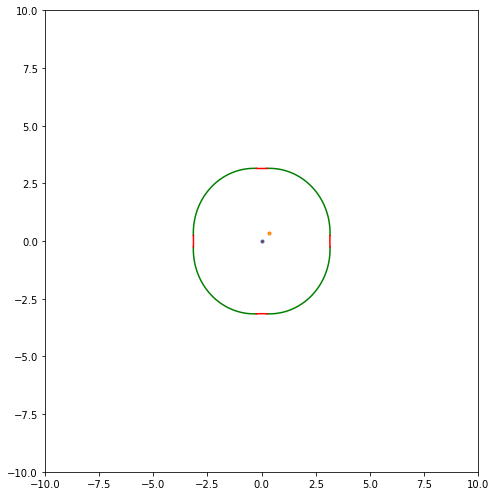

In [227]:
# plot all things together
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True
x_origin = [0]
y_origin = [0]
x_centre1=offset*np.cos(theta_r)
y_centre1=offset*np.sin(theta_r)
x_centre2=[offset]
y_centre2=[0]
plt.xlim(-10,10)
plt.ylim(-10, 10)
# plt.grid()
#plt.axis('equal')

# plt.plot(xp1,yp1)
# plt.plot(xp2,yp2)
plt.plot(x_origin, y_origin, marker="o", markersize=3, markerfacecolor="red")
plt.plot(x_centre1, y_centre1, marker="o", markersize=3, markerfacecolor="orange")
# plt.plot(x_centre2, y_centre2, marker="o", markersize=3,markerfacecolor="green")

plt.plot(X_bigger_arc1_rot,y_bigger_arc1_rot,color='green')
plt.plot(X_bigger_arc2_rot,y_bigger_arc2_rot,color='green')
plt.plot(X_bigger_arc3_rot,y_bigger_arc3_rot,color='green')
plt.plot(X_bigger_arc4_rot,y_bigger_arc4_rot,color='green')


plt.plot(X_smaller_arc1_rot,y_smaller_arc1_rot,color='red')
plt.plot(X_smaller_arc2_rot,y_smaller_arc2_rot,color='red')
plt.plot(X_smaller_arc3_rot,y_smaller_arc3_rot,color='red')
plt.plot(X_smaller_arc4_rot,y_smaller_arc4_rot,color='red')


# import numpy as np
# a = np.arange(0,2*np.pi,0.1)
# X = inner_radius_stator*np.cos(a)
# Y = inner_radius_stator*np.sin(a)
# plt.plot(X,Y)
plt.savefig('2_arc_surf_rotated.png')